<a href="https://colab.research.google.com/github/harsh2k1/-Stock-Market-prediction-using-numerical-and-textual-analysis/blob/main/StockPredictionw_oSentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Name: Harshpreet Singh
## Name: Harshpreet Singh
##Task-1 GRIP-October 2021
##Stock Market prediction using numerical and textual analysis
##Level: Advanced


### Stock Market Prediction And Forecasting Using Stacked LSTM

In [ ]:
#pip install yfinance

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

In [ ]:
# path = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'
# df=pd.read_csv(path)
df = yf.download('^BSESN', start='2001-01-01', end='2021-10-05')

[*********************100%***********************]  1 of 1 completed


In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2001-01-02,3953.219971,4028.570068,3929.370117,4018.879883,4018.879883,0
2001-01-03,3977.580078,4067.659912,3977.580078,4060.020020,4060.020020,0
2001-01-04,4180.970215,4180.970215,4109.549805,4115.370117,4115.370117,0
2001-01-05,4116.339844,4195.009766,4115.350098,4183.729980,4183.729980,0
2001-01-08,4164.759766,4206.720215,4101.529785,4120.430176,4120.430176,0


In [ ]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-09-28,60285.890625,60288.441406,59045.531250,59667.601562,59667.601562,21100
2021-09-29,59296.539062,59678.660156,59111.410156,59413.269531,59413.269531,16100
2021-09-30,59549.570312,59557.238281,59019.281250,59126.359375,59126.359375,8900
2021-10-01,58889.769531,58890.078125,58551.140625,58765.578125,58765.578125,10200
2021-10-04,59143.000000,59548.820312,58952.109375,59299.320312,59299.320312,10000


In [ ]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,5107.0,19832.650631,1.273518e+04,2621.889893,9158.364746,17940.160156,28059.199219,6.030379e+04
High,5107.0,19949.672703,1.278081e+04,2682.590088,9293.689941,18047.859375,28168.855469,6.041232e+04
Low,5107.0,19676.326920,1.265640e+04,2594.870117,9005.709961,17800.289062,27881.274414,5.994655e+04
Close,5107.0,19811.523204,1.271863e+04,2600.120117,9091.799805,17933.140625,28051.370117,6.007788e+04
Adj Close,5107.0,19811.523204,1.271863e+04,2600.120117,9091.799805,17933.140625,28051.370117,6.007788e+04
Volume,5107.0,77817.994909,1.047398e+06,0.000000,9300.000000,13800.000000,20600.000000,3.181510e+07


In [ ]:
df.index.rename('key',inplace=True)
df['Date'] = df.index

In [ ]:
df.reset_index(inplace=True)

## Using only the Closed price

In [ ]:
df1 = df[['Date','Close']]
#df1 = df1.iloc[::-1]
df1.head()

,Date,Close
0,2001-01-02,4018.879883
1,2001-01-03,4060.020020
2,2001-01-04,4115.370117
3,2001-01-05,4183.729980
4,2001-01-08,4120.430176


In [ ]:
df1['Date'] = pd.to_datetime(df1['Date'])

In [ ]:
df1.dtypes

Date     datetime64[ns]
Close           float64
dtype: object

In [ ]:
df1 = df1.set_index(['Date'])
df1.head()

,Close
Date,
2001-01-02,4018.879883
2001-01-03,4060.020020
2001-01-04,4115.370117
2001-01-05,4183.729980
2001-01-08,4120.430176


# Data Visualization

## Line plot of Closed Price over the years

Text(0, 0.5, 'Closing Price')

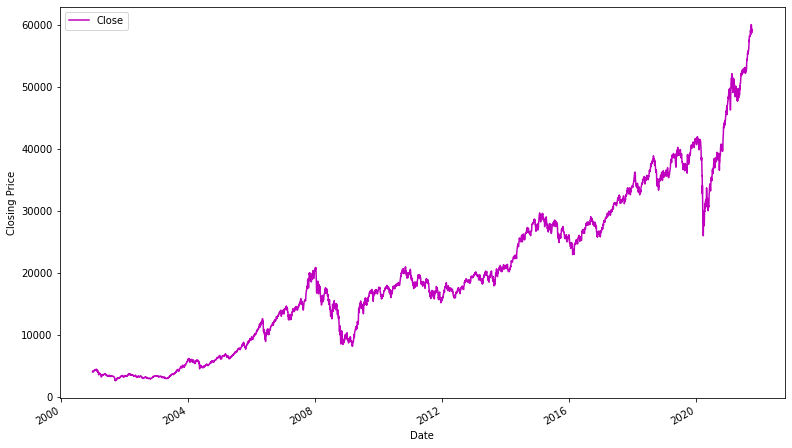

In [ ]:
# Line plot of Closed price over the years
df1.plot(figsize = (13,8), color = 'm')
plt.ylabel('Closing Price')

## Distribution of Closing Price

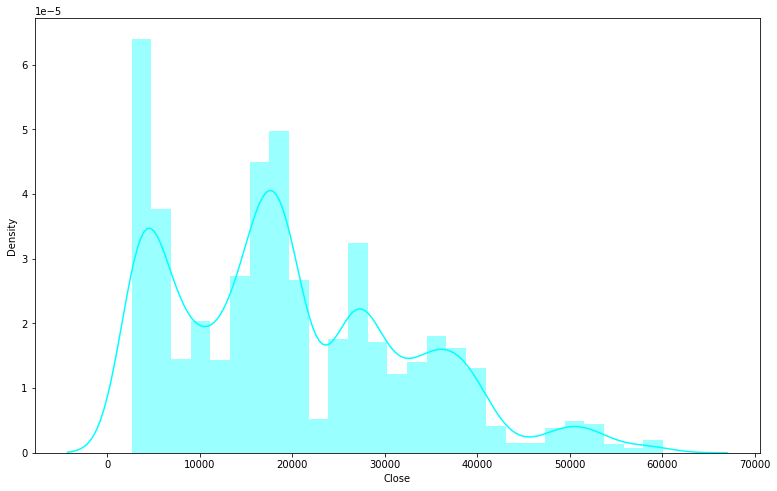

In [ ]:
# Distribution of Closing Price
plt.figure(figsize=(13,8))
sns.distplot(df1['Close'], color = 'cyan')

## Lag Plot

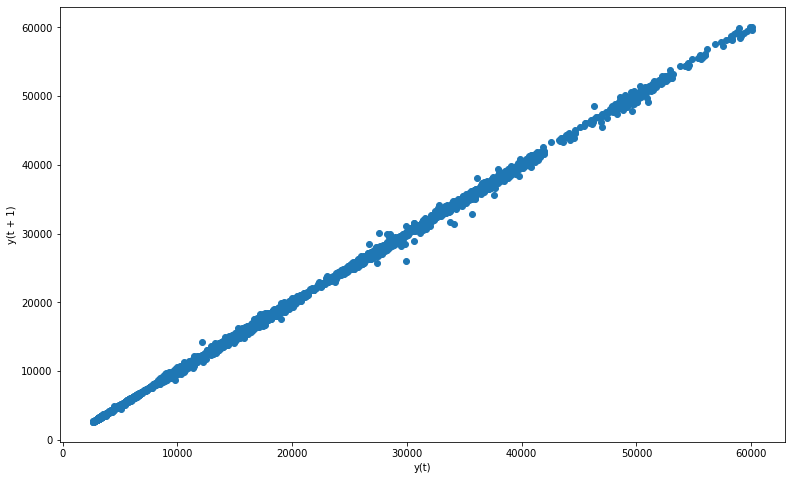

In [ ]:
# Lag Plot
from pandas.plotting import lag_plot
plt.figure(figsize=(13,8))
lag_plot(df1['Close'])
ax = plt.axes()
plt.show()

## ACF and PACF plot

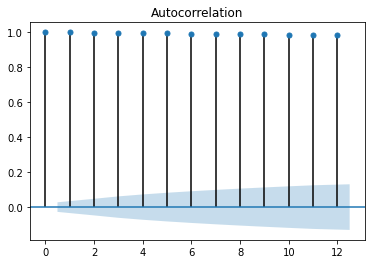

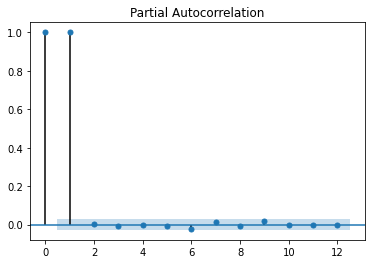

In [ ]:
# ACF and PACF plot
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(df1.Close,lags=12)
ax = plt.axes()
tsa_plots.plot_pacf(df1.Close,lags=12)
ax = plt.axes()
plt.show()

## Decomposition of the Close Price

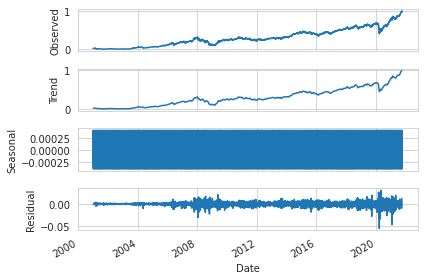

In [ ]:
# Decomposition of the Close price
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts = seasonal_decompose(df1.Close, freq = 12)
decompose_ts.plot()
plt.show()

#### Upward trend can be observed

# Data Pre-processing

## 1. Data Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1['Close'] = scaler.fit_transform(np.array(df1['Close']).reshape(-1,1))

In [ ]:
df1.head()

,Close
Date,
2001-01-02,0.024684
2001-01-03,0.025399
2001-01-04,0.026362
2001-01-05,0.027552
2001-01-08,0.026450


## 2. Data Splitting

### a. Into Train and Test data

In [ ]:
training_size = int(len(df1) * 0.65)      # 65% of length of data
test_size = len(df1) - training_size      # 35% of length of data
train_data, test_data = df1.iloc[0:training_size, :], df1.iloc[training_size:len(df1), :]

In [ ]:
training_size,test_size

(3319, 1788)

In [ ]:
train_data[:5]

,Close
Date,
2001-01-02,0.024684
2001-01-03,0.025399
2001-01-04,0.026362
2001-01-05,0.027552
2001-01-08,0.026450


In [ ]:
train_data = np.array(train_data['Close'])
test_data = np.array(test_data['Close'])

In [ ]:
train_data = train_data.reshape(-1,1)
test_data = test_data.reshape(-1,1)

### b. Into independent and dependent variables

In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]    
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
X_train.shape, y_train.shape

((3218, 100), (3218,))

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

# Modelling

## Creating the Stacked LSTM Model

In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , LSTM , Dropout
from keras.wrappers.scikit_learn import KerasRegressor

In [ ]:
model=Sequential()
model.add(LSTM(100,return_sequences=True,input_shape=(100,1)))
model.add(Dropout(0.1))
model.add(LSTM(50,return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(50))
model.add(Dropout(0.1))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 100)          40800     
_________________________________________________________________
dropout (Dropout)            (None, 100, 100)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           30200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 50)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 5

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=50,batch_size=20,verbose=1)

Epoch 1/50
161/161 [==============================] - 24s 90ms/step - loss: 0.0012 - val_loss: 0.0018
Epoch 2/50
161/161 [==============================] - 13s 82ms/step - loss: 2.7866e-04 - val_loss: 0.0019
Epoch 3/50
161/161 [==============================] - 13s 82ms/step - loss: 2.2506e-04 - val_loss: 6.1206e-04
Epoch 4/50
161/161 [==============================] - 13s 82ms/step - loss: 2.2869e-04 - val_loss: 4.8950e-04
Epoch 5/50
161/161 [==============================] - 13s 82ms/step - loss: 2.2241e-04 - val_loss: 5.8384e-04
Epoch 6/50
161/161 [==============================] - 13s 82ms/step - loss: 1.7948e-04 - val_loss: 3.5734e-04
Epoch 7/50
161/161 [==============================] - 13s 82ms/step - loss: 1.7893e-04 - val_loss: 0.0011
Epoch 8/50
161/161 [==============================] - 13s 82ms/step - loss: 1.6927e-04 - val_loss: 5.6501e-04
Epoch 9/50
161/161 [==============================] - 13s 82ms/step - loss: 1.3796e-04 - val_loss: 2.3754e-04
Epoch 10/50
161/161 [=====

## Making Predictions

In [ ]:
# Making Predictions
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
# Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

## RMSE Score

In [ ]:
# Calculating RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

13956.300152153823

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

35783.785089164914

# Experimental Analysis

## Plotting predictions on testing data

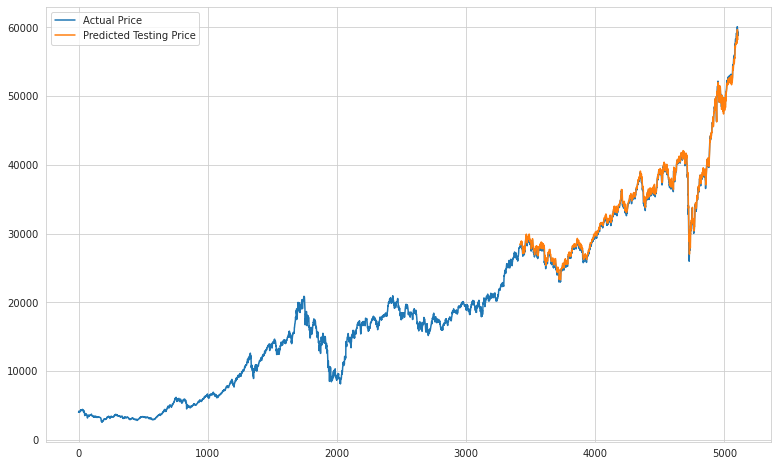

In [ ]:
# Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.figure(figsize = (13,8))
sns.set_style('whitegrid')
plt.plot(scaler.inverse_transform(df1) , label = 'Actual Price')
# plt.plot(trainPredictPlot)
plt.plot(testPredictPlot, label = 'Predicted Testing Price')
plt.legend()
plt.show()

In [ ]:
len(test_data)

1788

In [ ]:
x_input=test_data[1688:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input[:5]

[0.8018872279486503,
 0.8026135958669475,
 0.8173702548837462,
 0.8280282497178553,
 0.8229708587178549]

## Forecasting the Close Price for next 30 days

In [ ]:
# Taking previous 100 close prices as input and predicting 101st as output
# then taking 1st to 101st close prices as input and predicting 102nd as output and so on...

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        #print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        #print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

#print(lst_output)

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
len(df1)

5107

## Forecast for next 30 days wrt previous 100 days Close Price

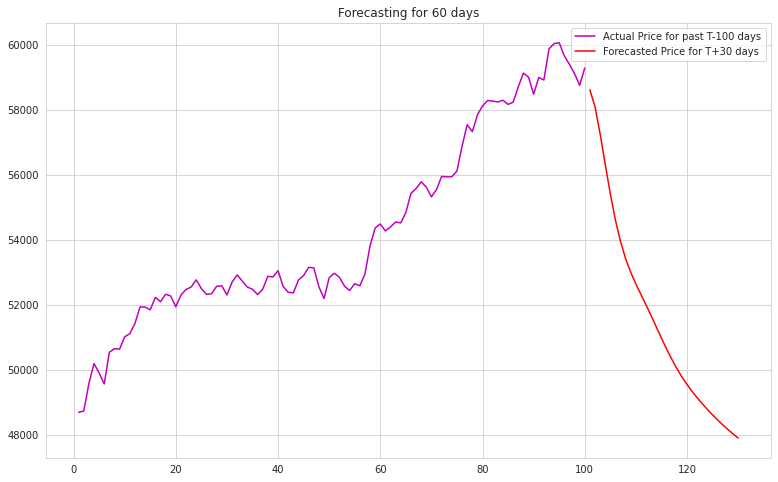

In [ ]:
plt.figure(figsize = (13,8))
plt.plot(day_new,scaler.inverse_transform(df1[-100:]), color = 'm' , label = 'Actual Price for past T-100 days')
plt.plot(day_pred,scaler.inverse_transform(lst_output), color = 'red', label = 'Forecasted Price for T+30 days ')
plt.title('Forecasting for 30 days')
plt.legend()

In [ ]:
from datetime import datetime
import datetime as dt
lst = list(df1.index)
numdays = 30
date_list = [lst[-1] + dt.timedelta(days=x) for x in range(numdays)]

In [ ]:
forecast = pd.DataFrame(scaler.inverse_transform(lst_output) , columns = ['Close'] , index = date_list)
forecast.head()

,Close
2021-10-04,58625.910128
2021-10-05,58105.060832
2021-10-06,57272.252164
2021-10-07,56334.900894
2021-10-08,55419.455094


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index(['Date'], inplace=True)

## Line plot of Close Price over the years with forecasted value for next 30 days

<Figure size 936x576 with 0 Axes>

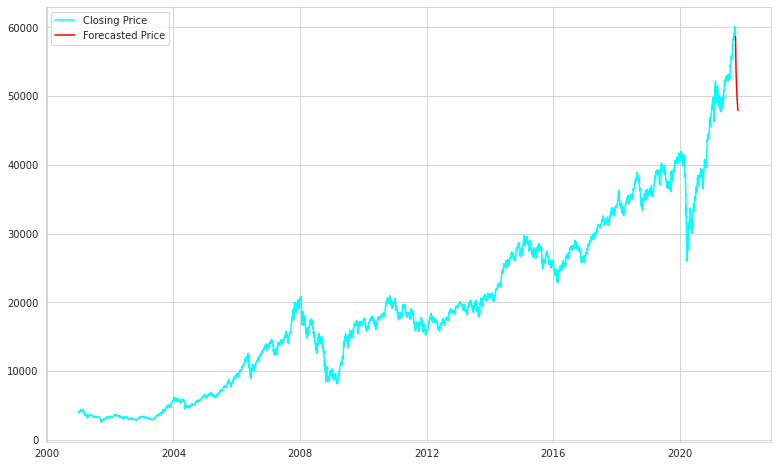

In [ ]:
plt.figure(figsize=(13,8))
_, ax = plt.subplots(figsize= (13,8))
ax.plot(df['Close'], label = 'Closing Price', color = 'cyan')
ax.plot(forecast['Close'], label = 'Forecasted Price', color = 'red')
plt.legend()